In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Carregar o banco de dados


Subindo o dataset


In [20]:
df_ethereum = pd.read_csv('/home/gabriellemitoso/modulo7-engcomp/ponderada-crypto/src/data/dados-puros/ethereum_daily_data.csv')

Obter infos sobre o csv


In [21]:
df_ethereum.shape

(365, 11)

In [22]:
df_ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          365 non-null    object 
 1   open_price    365 non-null    float64
 2   close_price   365 non-null    float64
 3   min_price     365 non-null    float64
 4   max_price     365 non-null    float64
 5   total_volume  365 non-null    float64
 6   7_day_MA      359 non-null    float64
 7   daily_return  364 non-null    float64
 8   volatility    358 non-null    float64
 9   VWAP          0 non-null      float64
 10  RSI           352 non-null    float64
dtypes: float64(10), object(1)
memory usage: 31.5+ KB


In [23]:
df_ethereum.columns

Index(['date', 'open_price', 'close_price', 'min_price', 'max_price',
       'total_volume', '7_day_MA', 'daily_return', 'volatility', 'VWAP',
       'RSI'],
      dtype='object')

date: Data do registro dos preços e volumes.

open_price: Preço de abertura do ativo nesse dia, ou seja, o preço ao qual o ativo foi negociado no início do pregão.

close_price: Preço de fechamento do ativo nesse dia, ou seja, o preço da última negociação do ativo ao fim do pregão.

min_price: Menor preço registrado durante o dia.

max_price: Maior preço registrado durante o dia.

total_volume: Volume total de negociação do ativo, representando a quantidade de ações ou contratos negociados no dia.

7_day_MA (Média Móvel de 7 dias): Média móvel do preço de fechamento nos últimos 7 dias, usada para suavizar flutuações diárias e identificar tendências.

daily_return (Retorno Diário): Retorno percentual diário do ativo, calculado pela fórmula. Indica a variação percentual do preço do ativo de um dia para o outro.

volatility: Medida da variação dos preços do ativo ao longo do tempo, representando o risco associado ao ativo. É calculada usando a variação percentual diária do preço.

VWAP (Volume Weighted Average Price): Preço médio ponderado pelo volume, que dá uma média dos preços de negociação ao longo do dia, ponderada pelo volume negociado em cada preço.

RSI (Relative Strength Index): Indicador técnico que mede a força do ativo em termos de compras e vendas, oscilando entre 0 e 100. Um valor acima de 70 indica que o ativo pode estar sobrecomprado (overbought), enquanto abaixo de 30 indica que pode estar sobrevendido (oversold).

In [24]:
# Ter informacoes de quais dados sao nulos e sua quantidade para saber quatos irao ser descartados
df_ethereum.isna().sum()

date              0
open_price        0
close_price       0
min_price         0
max_price         0
total_volume      0
7_day_MA          6
daily_return      1
volatility        7
VWAP            365
RSI              13
dtype: int64

In [25]:
# Renomeando as colunas
df_ethereum = df_ethereum.rename(columns={
    'date': 'Data', 
    'open_price': 'Abertura', 
    'close_price': 'Ultimo', 
    'min_price': 'Minima', 
    'max_price': 'Maxima', 
    'total_volume': 'Vol', 
    'daily_return': 'Var', 
    'volatility': 'Volatilidade'
})

# Removendo a coluna 'VWAP'
df_ethereum = df_ethereum.drop(columns=['VWAP'])
df_ethereum = df_ethereum.drop(columns=['RSI'])

# Exibindo o DataFrame atualizado
print(df_ethereum)


           Data     Abertura       Ultimo       Minima       Maxima  \
0    2023-09-25  1580.477795  1580.477795  1580.477795  1580.477795   
1    2023-09-26  1588.471183  1588.471183  1588.471183  1588.471183   
2    2023-09-27  1592.486126  1592.486126  1592.486126  1592.486126   
3    2023-09-28  1597.416810  1597.416810  1597.416810  1597.416810   
4    2023-09-29  1652.196397  1652.196397  1652.196397  1652.196397   
..          ...          ...          ...          ...          ...   
360  2024-09-19  2361.960992  2361.960992  2361.960992  2361.960992   
361  2024-09-20  2465.234783  2465.234783  2465.234783  2465.234783   
362  2024-09-21  2557.621856  2557.621856  2557.621856  2557.621856   
363  2024-09-22  2614.599605  2614.599605  2614.599605  2614.599605   
364  2024-09-23  2582.847684  2578.218763  2578.218763  2582.847684   

              Vol     7_day_MA       Var  Volatilidade  
0    4.019151e+09          NaN       NaN           NaN  
1    5.882823e+09          NaN  0

In [26]:
df_ethereum['7_day_MA'] = df_ethereum['Ultimo'].rolling(window=7).mean()
df_ethereum['Var'] = df_ethereum['Var'].fillna(0)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_ethereum[['Abertura', 'Ultimo', 'Vol', 'Maxima', 'Minima', 'Volatilidade', 'Vol']] = scaler.fit_transform(df_ethereum[['Abertura', 'Ultimo', 'Vol', 'Maxima', 'Minima', 'Volatilidade', 'Vol']])

df_ethereum

,Data,Abertura,Ultimo,Minima,Maxima,Vol,7_day_MA,Var,Volatilidade
0,2023-09-25,0.017233,0.017233,0.017233,0.017233,0.007665,NaN,0.000000,NaN
1,2023-09-26,0.020388,0.020388,0.020388,0.020388,0.034255,NaN,0.005058,NaN
2,2023-09-27,0.021972,0.021972,0.021972,0.021972,0.017946,NaN,0.002528,NaN
3,2023-09-28,0.023918,0.023918,0.023918,0.023918,0.032035,NaN,0.003096,NaN
4,2023-09-29,0.045538,0.045538,0.045538,0.045538,0.137543,NaN,0.034293,NaN
...,...,...,...,...,...,...,...,...,...
360,2024-09-19,0.325658,0.325658,0.325658,0.325658,0.200354,2363.757262,0.008914,0.211328
361,2024-09-20,0.366416,0.366416,0.366416,0.366416,0.204571,2378.462197,0.043724,0.276159
362,2024-09-21,0.402878,0.402878,0.402878,0.402878,0.214249,2394.538718,0.037476,0.281596
363,2024-09-22,0.425365,0.425365,0.425365,0.425365,0.082669,2422.612546,0.022278,0.272522


In [28]:
correlation_matrix = df_ethereum[['Var', 'Volatilidade']].corr()
print(correlation_matrix)


                   Var  Volatilidade
Var           1.000000      0.103623
Volatilidade  0.103623      1.000000


In [29]:
# Transformação para float dos dados 
for i in df_ethereum.columns:
    try:
        if(i != 'Data'):
            df_ethereum[f'{i}'] = df[f'{i}'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    except:
        pass
df_ethereum

,Data,Abertura,Ultimo,Minima,Maxima,Vol,7_day_MA,Var,Volatilidade
0,2023-09-25,0.017233,0.017233,0.017233,0.017233,0.007665,NaN,0.000000,NaN
1,2023-09-26,0.020388,0.020388,0.020388,0.020388,0.034255,NaN,0.005058,NaN
2,2023-09-27,0.021972,0.021972,0.021972,0.021972,0.017946,NaN,0.002528,NaN
3,2023-09-28,0.023918,0.023918,0.023918,0.023918,0.032035,NaN,0.003096,NaN
4,2023-09-29,0.045538,0.045538,0.045538,0.045538,0.137543,NaN,0.034293,NaN
...,...,...,...,...,...,...,...,...,...
360,2024-09-19,0.325658,0.325658,0.325658,0.325658,0.200354,2363.757262,0.008914,0.211328
361,2024-09-20,0.366416,0.366416,0.366416,0.366416,0.204571,2378.462197,0.043724,0.276159
362,2024-09-21,0.402878,0.402878,0.402878,0.402878,0.214249,2394.538718,0.037476,0.281596
363,2024-09-22,0.425365,0.425365,0.425365,0.425365,0.082669,2422.612546,0.022278,0.272522


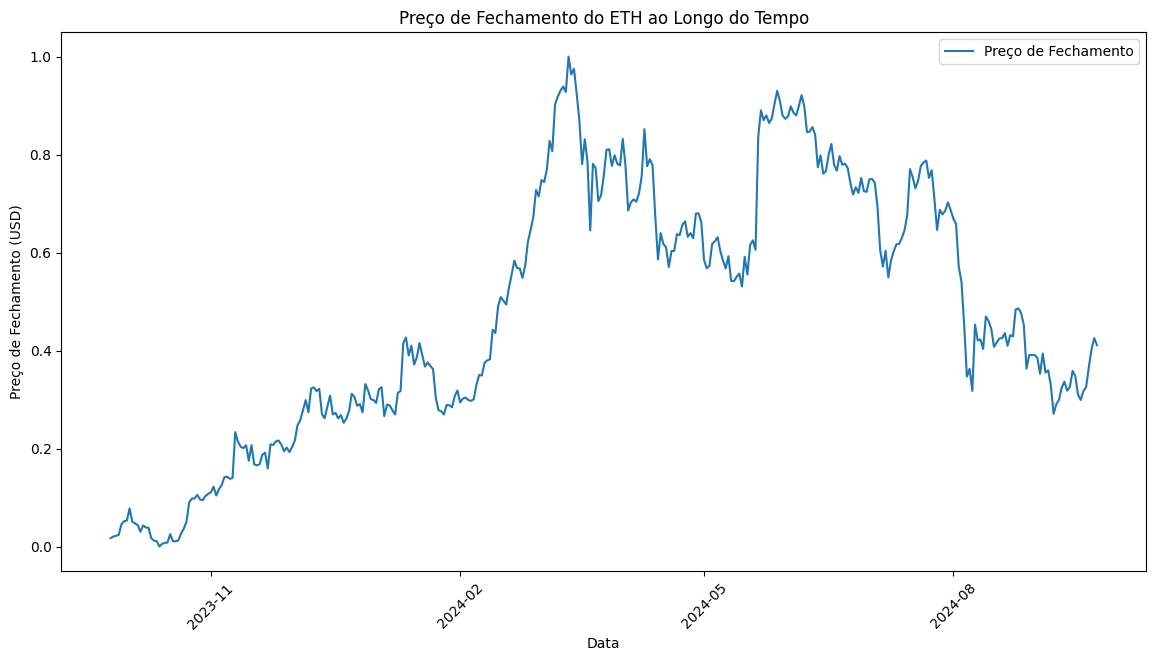

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Converter a coluna 'Data' para o tipo datetime
df_ethereum['Data'] = pd.to_datetime(df_ethereum['Data'])

plt.figure(figsize=(14, 7))
plt.plot(df_ethereum['Data'], df_ethereum['Ultimo'], label='Preço de Fechamento')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento do ETH ao Longo do Tempo')
plt.legend()
plt.show()


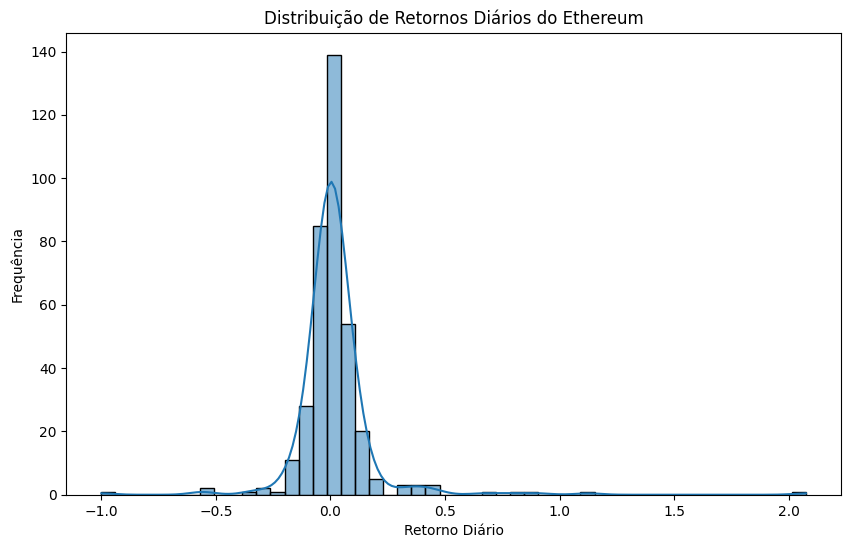

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ethereum['Retorno_Diario'] = df_ethereum['Ultimo'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(df_ethereum['Retorno_Diario'].dropna(), bins=50, kde=True)

plt.title('Distribuição de Retornos Diários do Ethereum')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()


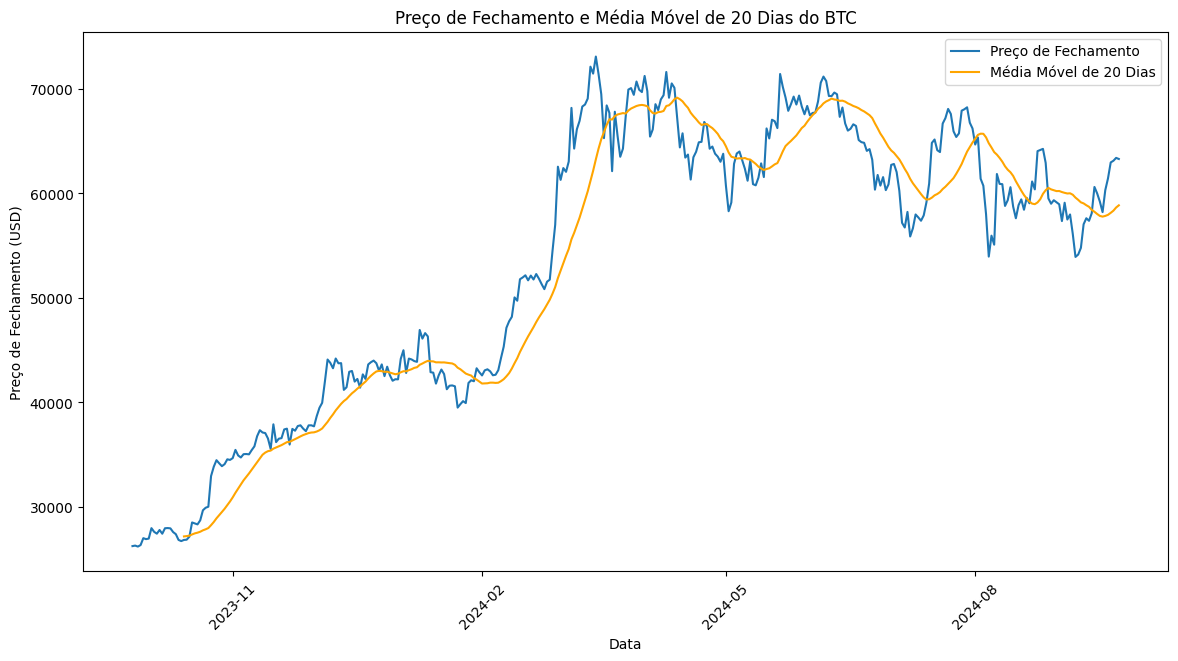

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Converter a coluna 'Data' para o tipo datetime
df_btc['Data'] = pd.to_datetime(df_btc['Data'])

# Calculando a Média Móvel de 20 dias (alterado 'Close' para 'Ultimo')
df_btc['SMA_20'] = df_btc['Ultimo'].rolling(window=20).mean()

# Plotando as Médias Móveis
plt.figure(figsize=(14, 7))
plt.plot(df_btc['Data'], df_btc['Ultimo'], label='Preço de Fechamento')
plt.plot(df_btc['Data'], df_btc['SMA_20'], label='Média Móvel de 20 Dias', color='orange')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento e Média Móvel de 20 Dias do BTC')
plt.legend()
plt.show()


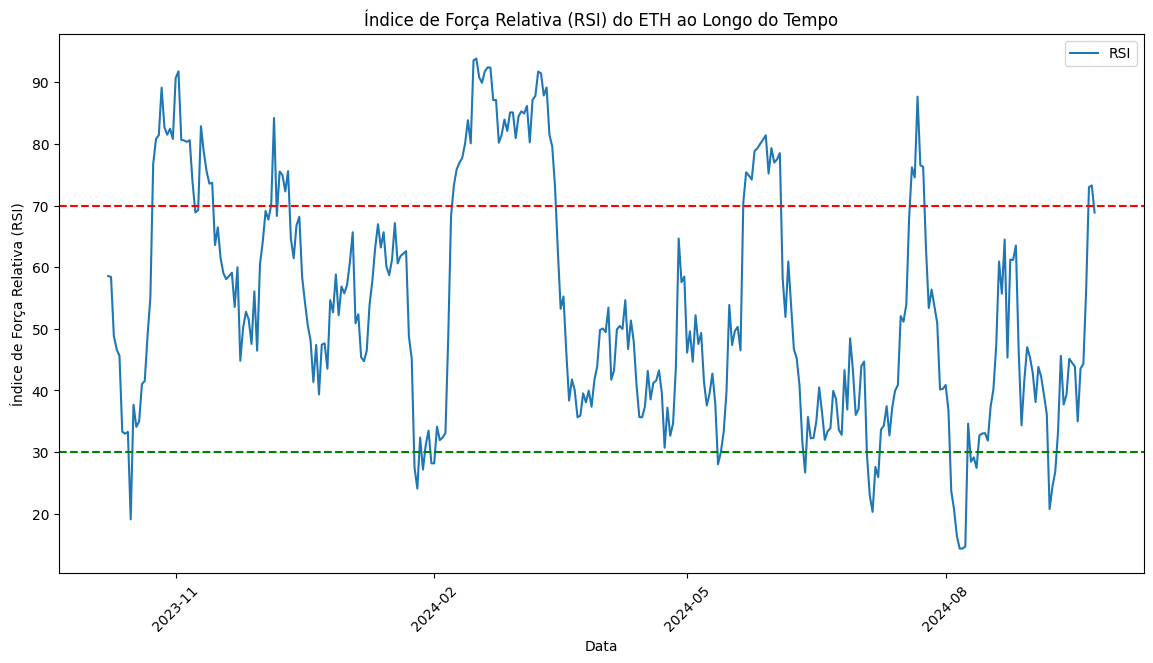

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Converter a coluna 'Data' para o tipo datetime
df_ethereum['Data'] = pd.to_datetime(df_ethereum['Data'])

# Função para calcular o RSI (alterado 'Close' para 'Ultimo')
def calculate_rsi(data, window=14):
    delta = data['Ultimo'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_ethereum['RSI'] = calculate_rsi(df_ethereum)

plt.figure(figsize=(14, 7))
plt.plot(df_ethereum['Data'], df_ethereum['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')  
plt.axhline(30, color='green', linestyle='--') 

plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xlabel('Data')
plt.ylabel('Índice de Força Relativa (RSI)')
plt.title('Índice de Força Relativa (RSI) do ETH ao Longo do Tempo')
plt.legend()
plt.show()


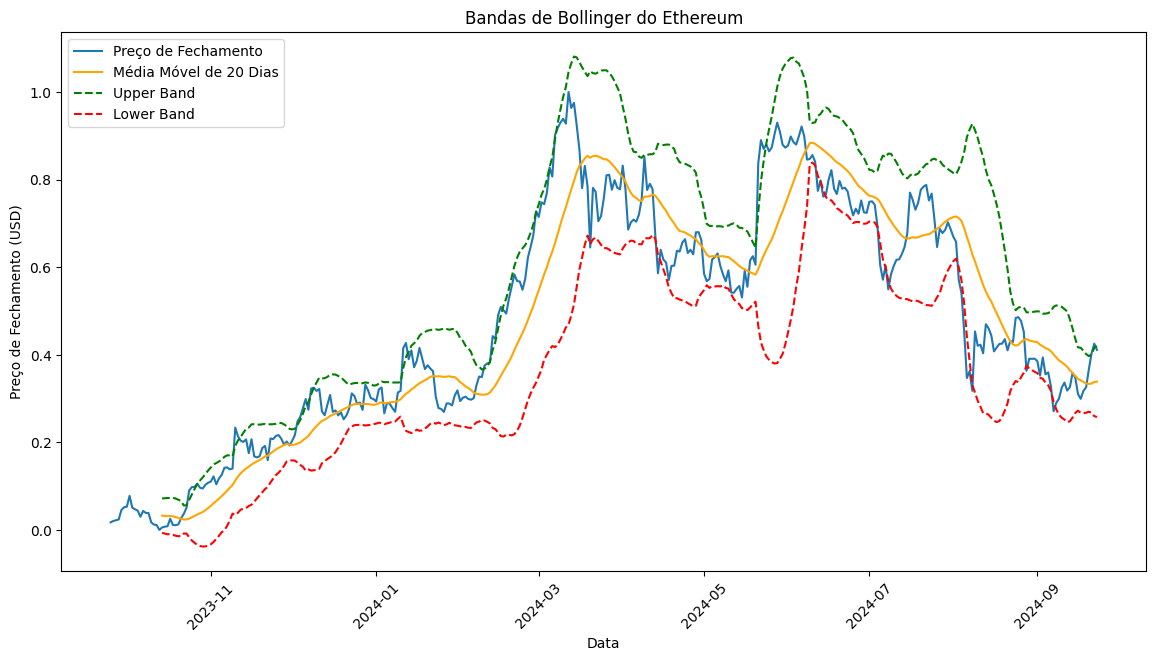

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculando as Bandas de Bollinger para Ethereum
df_ethereum['SMA_20'] = df_ethereum['Ultimo'].rolling(window=20).mean()
df_ethereum['Upper_Band'] = df_ethereum['SMA_20'] + (df_ethereum['Ultimo'].rolling(window=20).std() * 2)
df_ethereum['Lower_Band'] = df_ethereum['SMA_20'] - (df_ethereum['Ultimo'].rolling(window=20).std() * 2)

# Plotando as Bandas de Bollinger para Ethereum
plt.figure(figsize=(14, 7))
plt.plot(df_ethereum['Data'], df_ethereum['Ultimo'], label='Preço de Fechamento')
plt.plot(df_ethereum['Data'], df_ethereum['SMA_20'], label='Média Móvel de 20 Dias', color='orange')
plt.plot(df_ethereum['Data'], df_ethereum['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(df_ethereum['Data'], df_ethereum['Lower_Band'], label='Lower Band', color='red', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Bandas de Bollinger do Ethereum')
plt.legend()
plt.show()
